In [ ]:
import h5py
import numpy as np
import keras
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import gc
import pickle
from sklearn import model_selection
from sklearn import preprocessing

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, Input, concatenate, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/earth_data.zip" -d "./"

Archive:  /content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/earth_data.zip
  inflating: ./earth_data.h5         


In [ ]:
!ls

earth_data.h5  gdrive  sample_data


In [ ]:
def loadDataH5():
    with h5py.File('earth_data.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))
        valY = np.array(hf.get('valY'))
        print (trainX.shape,trainY.shape)
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY

In [ ]:
def extract_features(model, trainX, valX):
    trainFeatures = model.predict(trainX)
    valFeatures = model.predict(valX)

    return train_features, val_features

In [ ]:
def fit(trainX, trainY, model = 'LR'):

    if model == 'LR':
        LRC = LogisticRegression(random_state = 195877)
        LRC.fit(trainX, trainY)
        return LRC
    
    elif model == 'RFC':
        RFC = RandomForestClassifier(random_state = 195877, n_jobs = -1)
        RFC.fit(trainX, trainY)
        return RFC

    elif model =="SVC":
        SV = SVC(random_state = 195877)
        SV.fit(trainX, trainY)
        return SV

In [ ]:
def predict_and_score(mlModel, trainX, trainY, valX, valY):
    trainPredictions = mlModel.predict(trainX)
    valPredictions = mlModel.predict(valX)

    print("\n\t\tConfustion matrix on train data: \n", confusion_matrix(trainY, trainPredictions))
    print("\n\t\tAccuracy on train data: ", accuracy_score(trainY, trainPredictions))

    print("\n\t\tConfusion matrix on val data: \n", confusion_matrix(valY, valPredictions))
    print("\n\t\tAccuracy on val data: ", accuracy_score(valY, valPredictions))

In [ ]:
def extract_and_save_features(trainX, valX):

    vgg16_train_image_features_filename = "/content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/train_image_features_vgg16.pkl"
    vgg16_val_image_features_filename = "/content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/val_image_features_vgg16.pkl"

    resnet50_train_image_features_filename = "/content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/train_image_features_resnet50.pkl"
    resnet50_val_image_features_filename = "/content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/val_image_features_resnet50.pkl"

    vgg19_train_image_features_filename = "/content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/train_image_features_vgg19.pkl"
    vgg19_val_image_features_filename = "/content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/val_image_features_vgg19.pkl"


    print("[Info...] Preprocessing the images as per vgg16 model requirement")
    trainX = keras.applications.vgg16.preprocess_input(trainX)
    valX = keras.applications.vgg16.preprocess_input(valX)

    print("\t[Info..] Extracting features from vgg16 model")
    vgg16Model = VGG16(weights = 'imagenet', include_top = False, input_shape = (64, 64, 3))

    print("\t[Info..] Extracting features for train images")
    trainFeatures = vgg16Model.predict(trainX, use_multiprocessing = True)

    print("\t[Info..] Extracting features for test images")
    valFeatures = vgg16Model.predict(valX, use_multiprocessing = True)

    trainFeatures = trainFeatures.reshape(trainFeatures.shape[0], -1)
    valFeatures = valFeatures.reshape(valFeatures.shape[0], -1)

    print("\tDumping the train image features into pickle")
    with open(vgg16_train_image_features_filename, 'wb') as image_features_file:
        pickle.dump(trainFeatures, image_features_file)

    print("\tDumping the test image features into pickle")
    with open(vgg16_val_image_features_filename, 'wb') as image_features_file:
        pickle.dump(valFeatures, image_features_file)

    del vgg16Model
    del trainFeatures
    del valFeatures

    print("Memory released: ", gc.collect())

    print("[Info...] Preprocessing the images as per resnet50 model requirement")
    trainX = keras.applications.resnet50.preprocess_input(trainX)
    valX = keras.applications.resnet50.preprocess_input(valX)

    print("\t[Info..] Extracting features from resnet50 model")
    resnet50Model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (64, 64, 3))

    print("\t[Info..] Extracting features for train images")
    trainFeatures = resnet50Model.predict(trainX, use_multiprocessing = True)

    print("\t[Info..] Extracting features for test images")
    valFeatures = resnet50Model.predict(valX, use_multiprocessing = True)

    trainFeatures = trainFeatures.reshape(trainFeatures.shape[0], -1)
    valFeatures = valFeatures.reshape(valFeatures.shape[0], -1)

    print("\tDumping the train image features into pickle")
    with open(resnet50_train_image_features_filename, 'wb') as image_features_file:
        pickle.dump(trainFeatures, image_features_file)

    print("\tDumping the test image features into pickle")
    with open(resnet50_val_image_features_filename, 'wb') as image_features_file:
        pickle.dump(valFeatures, image_features_file)
    
    # del vgg16Model
    del trainFeatures
    del valFeatures

    print("[Info...] Preprocessing the images as per vgg19 model requirement")
    trainX = keras.applications.vgg19.preprocess_input(trainX)
    valX = keras.applications.vgg19.preprocess_input(valX)

    print("\t[Info..] Extracting features from vgg19 model")
    vgg19Model = VGG19(weights = 'imagenet', include_top = False, input_shape = (64, 64, 3))

    print("\t[Info..] Extracting features for train images")
    trainFeatures = vgg19Model.predict(trainX, use_multiprocessing = True)

    print("\t[Info..] Extracting features for test images")
    valFeatures = vgg19Model.predict(valX, use_multiprocessing = True)

    trainFeatures = trainFeatures.reshape(trainFeatures.shape[0], -1)
    valFeatures = valFeatures.reshape(valFeatures.shape[0], -1)

    print("\tDumping the train image features into pickle")
    with open(vgg19_train_image_features_filename, 'wb') as image_features_file:
        pickle.dump(trainFeatures, image_features_file)

    print("\tDumping the test image features into pickle")
    with open(vgg19_val_image_features_filename, 'wb') as image_features_file:
        pickle.dump(valFeatures, image_features_file)

    print("Memory released: ", gc.collect())

In [ ]:
def read_pickle(model):
    
    if model == "vgg16":
        with open ("/content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/train_image_features_vgg16.pkl", 'rb') as trainFeaturesFile:
            trainX = pickle.load(trainFeaturesFile)
        with open ("/content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/val_image_features_vgg16.pkl", 'rb') as valFeaturesFile:
            valX = pickle.load(valFeaturesFile)

    if model == "resnet50":
        with open ("/content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/train_image_features_resnet50.pkl", 'rb') as trainFeaturesFile:
            trainX = pickle.load(trainFeaturesFile)
        with open ("/content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/val_image_features_resnet50.pkl", 'rb') as valFeaturesFile:
            valX = pickle.load(valFeaturesFile)

    if model == "vgg19":
        with open ("/content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/train_image_features_vgg19.pkl", 'rb') as trainFeaturesFile:
            trainX = pickle.load(trainFeaturesFile)
        with open ("/content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/val_image_features_vgg19.pkl", 'rb') as valFeaturesFile:
            valX = pickle.load(valFeaturesFile)
    
    return trainX, valX

In [ ]:
trainX, trainY, valX, valY = loadDataH5()
print(np.unique(trainY, return_counts=True))    # Get the counts for each class

(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([2400, 2400, 2400, 2000, 2000, 1600, 2000, 2400, 2000]))


In [ ]:
extract_and_save_features(trainX, valX)

[Info...] Preprocessing the images as per vgg19 model requirement
	[Info..] Extracting features from vgg19 model
	[Info..] Extracting features for train images
	[Info..] Extracting features for test images
	Dumping the train image features into pickle
	Dumping the test image features into pickle
Memory released:  1503


In [ ]:
def main(featuresModel, fineTune = False):
    # Read the data
    _, trainY, _, valY = loadDataH5()
    trainX, valX = read_pickle(featuresModel)

    scaler = preprocessing.StandardScaler()

    trainX = scaler.fit_transform(trainX)
    valX = scaler.transform(valX)

    if fineTune:
        return trainX, trainY, valX, valY
    else:
        print("\nUsing {} model extracted features".format(featuresModel))
        print("\n\tTraining a Logistic Regression classifier")
        mlModel = fit(trainX, trainY, model = 'LR')
        predict_and_score(mlModel, trainX, trainY, valX, valY)

        print("\n\tTraining a Random Forest classifier")
        mlModel = fit(trainX, trainY, model = "RFC")
        predict_and_score(mlModel, trainX, trainY, valX, valY)

        print("\n\tTraining a support vector classifier")
        mlModel = fit(trainX, trainY, model = "SVC")
        predict_and_score(mlModel, trainX, trainY, valX, valY)

In [ ]:
main("vgg16")

(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)

Using vgg16 model extracted features

	Training a Logistic Regression classifier


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



		Confustion matrix on train data: 
 [[2400    0    0    0    0    0    0    0    0]
 [   0 2400    0    0    0    0    0    0    0]
 [   0    0 2400    0    0    0    0    0    0]
 [   0    0    0 2000    0    0    0    0    0]
 [   0    0    0    0 2000    0    0    0    0]
 [   0    0    0    0    0 1600    0    0    0]
 [   0    0    0    0    0    0 2000    0    0]
 [   0    0    0    0    0    0    0 2400    0]
 [   0    0    0    0    0    0    0    0 2000]]

		Accuracy on train data:  1.0

		Confusion matrix on val data: 
 [[544   4   5  11   0   8  23   0   5]
 [  0 580  13   0   0   7   0   0   0]
 [  1   9 540   3   0  13  26   4   4]
 [ 11   3   5 412   7  10  17   2  33]
 [  2   0   0  10 462   0  11  10   5]
 [  4   8  11   5   0 352   9   0  11]
 [ 16   1  27  15   8   6 422   4   1]
 [  0   0   9   3  13   0   4 571   0]
 [ 13   6   8  46   3   7   4   0 413]]

		Accuracy on val data:  0.895

	Training a Random Forest classifier

		Confustion matrix on train data: 
 [[

### Due to time constriaint and colab limitation, could not run Gradient boost and support vector classifier on resnet50 and vgg19 features

In [ ]:
main("resnet50")

(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)

Using resnet50 model extracted features

	Training a Logistic Regression classifier


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



		Confustion matrix on train data: 
 [[2400    0    0    0    0    0    0    0    0]
 [   0 2400    0    0    0    0    0    0    0]
 [   0    0 2400    0    0    0    0    0    0]
 [   0    0    0 2000    0    0    0    0    0]
 [   0    0    0    0 2000    0    0    0    0]
 [   0    0    0    0    0 1600    0    0    0]
 [   0    0    0    0    0    0 2000    0    0]
 [   0    0    0    0    0    0    0 2400    0]
 [   0    0    0    0    0    0    0    0 2000]]

		Accuracy on train data:  1.0

		Confusion matrix on val data: 
 [[566   1   1   7   0   5  12   0   8]
 [  0 580  12   0   0   7   0   1   0]
 [  1   5 564   3   2   7   9   5   4]
 [  6   0   6 431   2   6  11   4  34]
 [  0   0   0   7 481   1   2   6   3]
 [  4   3   6   5   0 373   3   0   6]
 [ 12   0  21  17   6   2 436   2   4]
 [  0   0   2   1   8   0   4 585   0]
 [ 10   3   9  34   1   9   3   3 428]]

		Accuracy on val data:  0.9258333333333333

	Training a Random Forest classifier

		Confustion matrix on tra

In [ ]:
main("vgg19")

(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)

Using vgg19 model extracted features

	Training a Logistic Regression classifier


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



		Confustion matrix on train data: 
 [[2400    0    0    0    0    0    0    0    0]
 [   0 2400    0    0    0    0    0    0    0]
 [   0    0 2400    0    0    0    0    0    0]
 [   0    0    0 2000    0    0    0    0    0]
 [   0    0    0    0 2000    0    0    0    0]
 [   0    0    0    0    0 1600    0    0    0]
 [   0    0    0    0    0    0 2000    0    0]
 [   0    0    0    0    0    0    0 2400    0]
 [   0    0    0    0    0    0    0    0 2000]]

		Accuracy on train data:  1.0

		Confusion matrix on val data: 
 [[543   2   2  11   0  13  17   1  11]
 [  0 577  15   0   0   7   0   0   1]
 [  1  10 541   6   0   8  25   5   4]
 [ 12   0   4 385  14   9  22   4  50]
 [  2   0   1  14 462   0   8  11   2]
 [ 11  15  11   6   0 345   5   0   7]
 [ 10   0  27  14   9   8 428   2   2]
 [  0   2   6   2   6   0   9 573   2]
 [ 10   3  11  40   2  14   2   4 414]]

		Accuracy on val data:  0.8891666666666667

	Training a Random Forest classifier

		Confustion matrix on tra

# TRANSFER LEARNING AND FINE TUNING

In [ ]:
def plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title('Model loss/accuracy')
    plt.ylabel('accuracy/loss')
    plt.xlabel('epochs')
    plt.legend(['train loss', 'val loss', 'train accuracy', 'val accuracy'], loc='upper right')
    plt.show()

In [ ]:
def build_custom_layers(no_of_features, no_of_classes):
    model = Sequential()
    # For VGG16 features
    # model.add(Dense(no_of_features, input_dim = no_of_features, activation = "relu"))
    # model.add(Dense(no_of_features, activation = "relu"))
    # model.add(Dense(no_of_classes, activation = "softmax"))

    # model.add(Dense(no_of_features, input_dim = no_of_features, activation = "relu"))
    # model.add(BatchNormalization())
    # model.add(Dropout(0.2))
    # model.add(Dense(no_of_features, activation = "relu"))
    # model.add(BatchNormalization())
    # model.add(Dense(no_of_classes, activation = "softmax"))

    # model.add(Dense(no_of_features, input_dim = no_of_features, activation = "relu"))
    # model.add(Dense(no_of_features, activation = "relu"))
    # model.add(Dense(512, activation = "relu"))
    # model.add(Dense(no_of_classes, activation = "softmax"))

    # For Resnet50 features
    # model.add(Dense(no_of_classes, input_dim = no_of_features, activation = "softmax"))

    # model.add(Dense(no_of_features, input_dim = no_of_features, activation = "relu"))
    # model.add(Dense(no_of_features, activation = "relu"))
    # model.add(Dense(no_of_classes, activation = "softmax"))

    # model.add(Dense(no_of_features, input_dim = no_of_features, activation = "relu"))
    # model.add(Dense(no_of_features, activation = "relu"))
    # model.add(Dense(512, activation = "relu"))
    # model.add(Dense(no_of_classes, activation = "softmax"))

    # For VGG19 features
    # model.add(Dense(no_of_features, input_dim = no_of_features, activation = "relu"))
    # model.add(Dense(no_of_features, activation = "relu"))
    # model.add(Dense(no_of_classes, activation = "softmax"))

    model.add(Dense(no_of_features, input_dim = no_of_features, activation = "relu"))
    model.add(Dense(no_of_features, activation = "relu"))
    model.add(Dense(512, activation = "relu"))
    model.add(Dense(no_of_classes, activation = "softmax"))

    return model

In [ ]:
def build_and_train(trainX, trainY, valX, valY):
    
    no_of_features = trainX.shape[1]
    no_of_classes = len(np.unique(trainY))
    print("Total features: ", no_of_features)
    print("Number of classes: ", no_of_classes)

    model = build_custom_layers(no_of_features, no_of_classes)
    model.summary()

    opt = Adam(learning_rate = 0.000001)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics='accuracy')

    es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(x= trainX, y=trainY, validation_data=(valX, valY), epochs=1000, callbacks=es, use_multiprocessing = True)

    return history

In [ ]:
# Using features extracted from VGG16 and mimik the exact architecture of VGG16
# trainX, trainY, valX, valY = main("vgg16", fineTune = True)
# trainX, trainY, valX, valY = main("resnet50", fineTune = True)
trainX, trainY, valX, valY = main("vgg19", fineTune = True)

(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)


## Below results are using vgg16 model features

In [ ]:
history = build_and_train(trainX, trainY, valX, valY)

Total features:  2048
Number of classes:  9
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_16 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_17 (Dense)             (None, 9)                 18441     
Total params: 8,411,145
Trainable params: 8,411,145
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
600/600 [==============================] - 3s 4ms/step - loss: 1.2209 - accuracy: 0.6463 - val_loss: 0.4229 - val_accuracy: 0.8771
Epoch 2/1000
600/600 [==============================] - 2s 4ms/step - loss: 0.3437 - accuracy: 0.8982 - val_loss: 0.3213 - val_accuracy: 0.8969
Epoch 3/1000
600/600 [====================

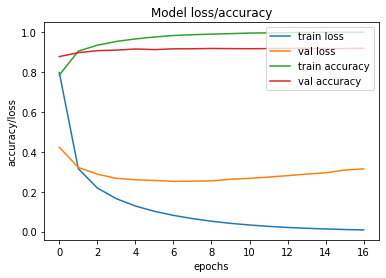

In [ ]:
plot(history)

## From above graph, we can see that model is overfitting, let's indtroduce some regularization in the form dropout

In [ ]:
history = build_and_train(trainX, trainY, valX, valY)

Total features:  2048
Number of classes:  9
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_20 (Dense)             (None, 9)                 18441     
Total params: 8,411,145
Trainable params: 8,411,145
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
600/600 [==============================] - 3s 4ms/step - loss: 1.3511 - accuracy: 0.5871 - val_loss: 0.4488 - val_accuracy: 0.8702
Epoch 2/1000
600/600 [==============================] 

## Below results are using resnet50 features

In [ ]:
history = build_and_train(trainX, trainY, valX, valY)

Total features:  8192
Number of classes:  9
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 9)                 73737     
Total params: 73,737
Trainable params: 73,737
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
600/600 [==============================] - 2s 3ms/step - loss: 2.1959 - accuracy: 0.3046 - val_loss: 1.1742 - val_accuracy: 0.6317
Epoch 2/1000
600/600 [==============================] - 2s 3ms/step - loss: 1.0111 - accuracy: 0.6847 - val_loss: 0.8133 - val_accuracy: 0.7581
Epoch 3/1000
600/600 [==============================] - 2s 3ms/step - loss: 0.7470 - accuracy: 0.7784 - val_loss: 0.6591 - val_accuracy: 0.8085
Epoch 4/1000
600/600 [==============================] - 2s 3ms/step - loss: 0.6052 - accuracy: 0.8229 - val_loss: 0.5716 - val_accuracy: 0.8344
Epoch 5/1000
600/600 [==

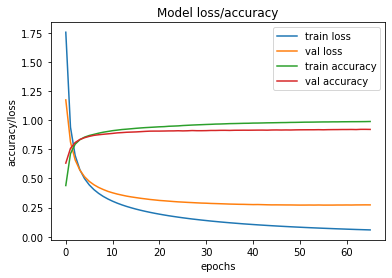

In [ ]:
plot(history)

In [ ]:
history = build_and_train(trainX, trainY, valX, valY)

Total features:  8192
Number of classes:  9
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 8192)              67117056  
_________________________________________________________________
dense_32 (Dense)             (None, 8192)              67117056  
_________________________________________________________________
dense_33 (Dense)             (None, 9)                 73737     
Total params: 134,307,849
Trainable params: 134,307,849
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
600/600 [==============================] - 19s 31ms/step - loss: 1.4074 - accuracy: 0.5812 - val_loss: 0.5536 - val_accuracy: 0.8633
Epoch 2/1000
600/600 [==============================] - 19s 31ms/step - loss: 0.4723 - accuracy: 0.8766 - val_loss: 0.4009 - val_accuracy: 0.8844
Epoch 3/1000
600/600 [===========

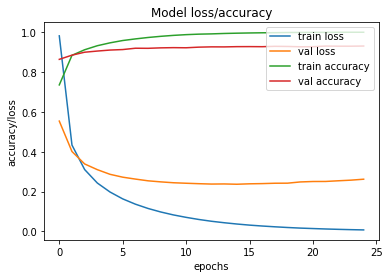

In [ ]:
plot(history)